# Pandas

- started by [Rita Colaço](https://www.cpr.ku.dk/staff/?id=621366&vis=medarbejder), continued by [Henry Webel](https://twitter.com/Henrywebel)

## Introduction

Pandas is built on top of `numpy`. It has an interface to directly plot using `maptlotlib`.

Pandas is well suited for tabular data with heterogeneously-typed columns, as in an Excel spreadsheet

Pandas is a library for data analysis and its powertool is the **`DataFrame`**.

## Two main classes (types/ objects)

1. `pandas.Series`
2. `pandas.DataFrame`

- a `Series` is a `numpy.array` with an `Index` series.
- a column in a `DataFrame` is a `Series`.
- columns in a `DataFrame` share an `Index`

In [1]:
import pandas as pd
import numpy as np

## Creating an instance of a `pandas.Series`

There are many ways. But a Series is an object holding some data.

Let's create a Series from a built-in `range` and a `numpy.arange` object:

In [2]:
series_range = pd.Series(range(3,13))
series_range

0     3
1     4
2     5
3     6
4     7
5     8
6     9
7    10
8    11
9    12
dtype: int64

In [3]:
series_np_arange = pd.Series(np.arange(3,13))
series_np_arange

0     3
1     4
2     5
3     6
4     7
5     8
6     9
7    10
8    11
9    12
dtype: int32

In [4]:
print("Series from range, underlying data:\t", series_range.values)
print("Series from np.arange underlying data:\t", series_np_arange.values)

Series from range, underlying data:	 [ 3  4  5  6  7  8  9 10 11 12]
Series from np.arange underlying data:	 [ 3  4  5  6  7  8  9 10 11 12]


In [5]:
series_range.values

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
series_np_arange.values

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
series_range.index

RangeIndex(start=0, stop=10, step=1)

In [8]:
series_np_arange.index

RangeIndex(start=0, stop=10, step=1)

> Exkurs: This shows you how to create the same index in case you ever need to

In [9]:
from pandas import RangeIndex
RangeIndex(start=0, stop=10, step=1)

RangeIndex(start=0, stop=10, step=1)

## What is a DataFrame?

A DataFrame is basically, a **Table** of data (or a tabular data structure) with labeled rows and columns. The rows are labeled by a special data structure called an Index, taht permits fast look-up and powerful relational operations.
For example:

| (index) | Name | Age | Height | LikesIceCream |
| :---: | :--: | :--: | :--: | :--: |
| 0     | "Nick" | 22 | 3.4 | True |
| 1     | "Jenn" | 55 | 1.2 | True |
| 2     | "Joe"  | 25 | 2.2 | True |

## Create a DataFrame directly

### From a `list` of `list`s

In [10]:
data = [
    [2.23, 1, "test"],
    [3.45, 2, "train"],
    [4.5, 3, "test"],
    [6.0, 4, "train"]
]

df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,2.23,1,test
1,3.45,2,train
2,4.50,3,test
3,6.00,4,train


### From a `list` of `dict`s

In [11]:
data = [
    {'A':2.23, 'B':1, 'C':"test"},
    {'A':3.45, 'B':2, 'C':"train"},
    {'A':4.5, 'B':3, 'C':"test"},
    {'A':6.0, 'B':4, 'C':"train"}
]

df = pd.DataFrame(data)
df

,A,B,C
0,2.23,1,test
1,3.45,2,train
2,4.50,3,test
3,6.00,4,train


### From a Dict of Lists

In [12]:
df = pd.DataFrame({
    'A': [2.23, 3.45, 4.5, 6.0],
    'B': [1, 2, 3, 4],
    'C': ["test", "train", "test", "train"]
})

df

,A,B,C
0,2.23,1,test
1,3.45,2,train
2,4.50,3,test
3,6.00,4,train


### From a `dict` of `dict`s

In [13]:
df = pd.DataFrame.from_dict(
{  
  'row1': {'A':2.23, 'B':1, 'C':"test"},
  'row3':  {'A':3.45, 'B':2, 'C':"train"},
  'row2':  {'A':4.5, 'B':3, 'C':"test"},
  'row4': {'A':6.0, 'B':4, 'C':"train"}
},
orient='index' # default is columns. pd.DataFrame also works, but you have to transpose the data
)
df

,A,B,C
row1,2.23,1,test
row3,3.45,2,train
row2,4.50,3,test
row4,6.00,4,train


### From an empty `DataFrame`

In [14]:
df = pd.DataFrame()
df['A'] = [2.23, 3.45, 4.5, 6.0]
df['B'] = [1, 2, 3, 4]
df['C'] = ["test", "train", "test", "train"]

In [15]:
df

,A,B,C
0,2.23,1,test
1,3.45,2,train
2,4.50,3,test
3,6.00,4,train


### Exercise 1
Please recreate the table below as a Dataframe using one of the approaches detailed above:

 -  | Year | Product | Cost |
---| :--: | :----:  | :--: |
0  | 2015 | Apples  | 0.35 |
1  | 2016 | Apples  | 0.45 |
2  | 2015 | Bananas | 0.75 |
3  | 2016 | Bananas | 1.10 |

Which approach did you prefer? Why?

## Making DataFrames from a Data File

Pandas has functions that can make DataFrames from a wide variety of file types.  To do this, use one of the functions in Pandas that start with `read_`.  Here is a non-exclusive list of examples:

| File Type | Function Name |
| :----:    |  :---:  |
| Excel | `pd.read_excel` |
| CSV, TSV | `pd.read_csv` |
| H5, HDF, HDF5 | `pd.read_hdf` |
| JSON  | `pd.read_json` |
| SQL | `pd.read_sql_table` |

> These are all functions, which can be called, i.e. `pd.read_csv()`

### Loading the Data

The file can be local or hosted: The `read_*`-function have many options and are very high general (in the sense of broad or comprehensive) functions.

In [16]:
url_ecdc_daily_cases = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv"
df = pd.read_csv(url_ecdc_daily_cases)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
1,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
2,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
3,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
4,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
...,...,...,...,...,...,...,...,...,...,...,...,...
61256,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61257,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61258,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61259,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


## Examining the Dataset

Sometimes, we might just want to quickly inspect the DataFrame:

### Attributes
```python
df.shape    # Shape of the object (2D)
df.dtypes   # Data types in each column
df.index    # Index range
df.columns  # Column names
```

### Methods

```python
df.describe()   # Descriptive statistics of columns
df.info()       # DataFrame information

```




### Shape

The first dimension are the number of rows (the `len`gth of the `DataFrame`), the second dimension the number of features or columns. The direction going down the rows is `axis=0` or `axis='index'`, and going over the columns is `axis=1` or `axis='columns`.

axis | descriptions
---  | ---
0    | index
1    | columns

In [17]:
df.shape  # axis=0

(61261, 12)

### Data types

In [18]:
df.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

### Index and Columns

In [19]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=61261, step=1)

You can set the index using `set_index`. Here we use a [general function](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html) `pandas.to_datetime` to encode date into better to specialised types, see e.g. [date functionality user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-series-date-functionality)

In [21]:
df.dateRep = pd.to_datetime(df.dateRep, format="%d/%m/%Y")
df.set_index('dateRep') # not persistent 

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19414458.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Belarus,BY,BLR,9452409.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Israel,IL,ISR,8519373.0,Asia,NaN
2019-12-31,31,12,2019,0,0,Vietnam,VN,VNM,96462108.0,Asia,NaN
2019-12-31,31,12,2019,0,0,San_Marino,SM,SMR,34453.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-11,11,12,2020,4,1,Saint_Lucia,LC,LCA,182795.0,America,19.694193
2020-12-11,11,12,2020,286,0,Belize,BZ,BLZ,390351.0,America,842.831196
2020-12-11,11,12,2020,25,0,Trinidad_and_Tobago,TT,TTO,1394969.0,America,18.853466


### Info and describe

In [22]:
_ = df.info() # returns None, only prints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61261 entries, 0 to 61260
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61261 non-null  datetime64[ns]
 1   day                                                         61261 non-null  int64         
 2   month                                                       61261 non-null  int64         
 3   year                                                        61261 non-null  int64         
 4   cases                                                       61261 non-null  int64         
 5   deaths                                                      61261 non-null  int64         
 6   countriesAndTerritories                                     61261 non-null  object        
 7   geoId                 

In [23]:
df.describe() # returns a new DataFrame

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61261.000000,61261.000000,61261.000000,61261.000000,61261.000000,6.114100e+04,58385.000000
mean,15.656405,7.015703,2019.998906,1130.942394,25.830153,4.103770e+07,64.943505
std,8.883068,2.926655,0.033053,6612.464104,130.365777,1.532541e+08,159.833339
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.728819
50%,16.000000,7.000000,2020.000000,15.000000,0.000000,7.813207e+06,6.644029
75%,23.000000,9.000000,2020.000000,267.000000,4.000000,2.851583e+07,51.406199
max,31.000000,12.000000,2020.000000,231930.000000,4928.000000,1.433784e+09,1900.836210


## Selecting Data

Pandas has a lot of flexibility in the number of syntaxes it supports.  For example, to select columns in a DataFrame:

```python
df['Column1']
df.Column1  # no whitespaces possible!
```

Multiple Columns can also be selected by providing a list:

```python
df[['Column1', 'Column2']]
```

Rows are selected with the **iloc** and **loc** attributes:

```python
df.iloc[5]  # Used to get the "integer" index of the row.
df.loc['Row6']  # Used if rows are named.
```

However, with large DataFrames, we often just want to see the first or last rows, or even just a sample of the rows.

| Method | Description |
| ---  | --- |
| `df.head(5)` | the first 5 rows |
| `df.tail(5)` | the last 5 rows |
| `df.sample(5)` | a random 5 rows |


In [24]:
df.set_index('countriesAndTerritories').loc['Denmark']

,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,,,,,
Denmark,2020-12-11,11,12,2020,3132,14,DK,DNK,5806081.0,Europe,432.202031
Denmark,2020-12-10,10,12,2020,2558,3,DK,DNK,5806081.0,Europe,398.771564
Denmark,2020-12-09,9,12,2020,2150,7,DK,DNK,5806081.0,Europe,375.089497
Denmark,2020-12-08,8,12,2020,2046,9,DK,DNK,5806081.0,Europe,361.603636
Denmark,2020-12-07,7,12,2020,1745,7,DK,DNK,5806081.0,Europe,346.498783
...,...,...,...,...,...,...,...,...,...,...,...
Denmark,2020-01-04,4,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
Denmark,2020-01-03,3,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
Denmark,2020-01-02,2,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN


### Sitenote: Plot cases for Denmark

Pandas can directly interact with matplotlib plotting functionality on the `DataFrame`

In [25]:
df_denmark = df.set_index('countriesAndTerritories').loc['Denmark'].reset_index().set_index('dateRep').sort_index()
df_denmark

,countriesAndTerritories,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,Denmark,31,12,2019,0,0,DK,DNK,5806081.0,Europe,NaN
2020-01-01,Denmark,1,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
2020-01-02,Denmark,2,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
2020-01-03,Denmark,3,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
2020-01-04,Denmark,4,1,2020,0,0,DK,DNK,5806081.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,Denmark,7,12,2020,1745,7,DK,DNK,5806081.0,Europe,346.498783
2020-12-08,Denmark,8,12,2020,2046,9,DK,DNK,5806081.0,Europe,361.603636
2020-12-09,Denmark,9,12,2020,2150,7,DK,DNK,5806081.0,Europe,375.089497


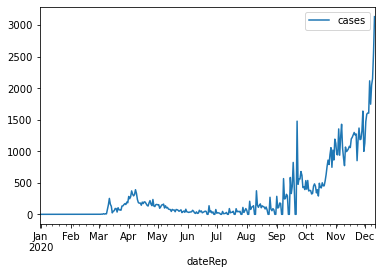

In [26]:
# df.plot(x='dateRep', y='cases')
_ = df_denmark.plot(y='cases') # data is the DataFrame itself 

### Exercise 2

Please open the file [`titanic.csv`]('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv') (using `pd.read_csv`) and use it to answer the following questions about the rdataset. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about it!

Display the first 5 lines of the dataset.

In [27]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

Show the last 3 lines of the "alive" column.

Check 3 random lines of the dataset

Make a new dataframe containing just the "survived", "sex", and "age" columns

Make a new dataframe containing just the 10th, 15th and 16th lines of the dataset

## Query/Filtering Data

To get rows based on their value, Pandas supports both Numpy's logical indexing:

```python
select_rows = df[df['Column1'] > 0]
```

and an SQL-like query string:
    
```python
df.query('Colummn1 > 0')
```

One can also filter based on multiple conditions, using the element-wise ("bit-wise") logical operators **`&`** data intersection, or **`|`** for the data union.

```python
select_rows = df[(df['Column1'] > 0) & (df['Column2'] > 2)]
```

```python
select_rows = df[(df['Column1'] > 0) | (df['Column2'] > 2)]
```

consider  first creating the mask (`Series` of `True` and `False` values indicating if a row is selected)

```python
mask = (df['Column1'] > 0) | (df['Column2'] > 2)
select_rows = df[mask]
```

Checkout the methods [`pandas.Series.isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html) or  [`pandas.Series.betweeen`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html?highlight=between#pandas.Series.between)

In [28]:
df[df['countriesAndTerritories']=='Denmark'] # not persistent

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
15420,2020-12-11,11,12,2020,3132,14,Denmark,DK,DNK,5806081.0,Europe,432.202031
15421,2020-12-10,10,12,2020,2558,3,Denmark,DK,DNK,5806081.0,Europe,398.771564
15422,2020-12-09,9,12,2020,2150,7,Denmark,DK,DNK,5806081.0,Europe,375.089497
15423,2020-12-08,8,12,2020,2046,9,Denmark,DK,DNK,5806081.0,Europe,361.603636
15424,2020-12-07,7,12,2020,1745,7,Denmark,DK,DNK,5806081.0,Europe,346.498783
...,...,...,...,...,...,...,...,...,...,...,...,...
15762,2020-01-04,4,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN
15763,2020-01-03,3,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN
15764,2020-01-02,2,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN
15765,2020-01-01,1,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN


### Exercise 3
Using the Titanic dataset, let's do some data querying exercises.

What is ticket fare for the 1st class? The 2nd? The 3rd?

In [29]:
pd.Series([True, True]) & pd.Series([False, False])

0    False
1    False
dtype: bool

Did the oldest passenger on the Titanic survive?

Was the youngest passenger on the Titanic alone?

How many passengers on the Titanic embarked from Cherbourg?

How much money did the Titanic make from passengers from Southampton? From Cherbourg? From Queenstown?

Considering only those passengers older than 22, were there more Males travelling alone from Southampton or Females in Third class from Cherbourg?

## Summarizing/Statistics in DataFrames

Pandas' Series and DataFrames are iterables, and can be given to any function that expects a list or Numpy Array, which allows them to be useful to many different libraries' functions.  For example, to compute basic statistics for a colum (`Series`):

```python
df['Column1'].count()
df['Column1'].max()
df['Column1'].mean()
df['Column2'][df['Column1'] == 'string'].sum()
```

or for row:

```python
df.loc['row_index_label`].sum() # count, std, mean, etc
```

or for all columns

```python
df.mean() # default by column (= over all index)
```

or for all rows

```python
df.mean(axis=1)
df.mean(axis='columns') # columns axis is axis 1
```

> What the default axis for a method (or operation) will vary.

In [30]:
df.mean() # uses numeric column only

day                                                           1.565640e+01
month                                                         7.015703e+00
year                                                          2.019999e+03
cases                                                         1.130942e+03
deaths                                                        2.583015e+01
popData2019                                                   4.103770e+07
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    6.494350e+01
dtype: float64

In [31]:
df.mean(axis='columns')

0        5.434840e+06
1        5.434861e+06
2        5.434850e+06
3        5.434859e+06
4        5.434863e+06
             ...     
61256    2.441254e+06
61257    2.441254e+06
61258    2.441253e+06
61259    2.441253e+06
61260    2.441253e+06
Length: 61261, dtype: float64

You can also use the [`pipe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html?highlight=pipe) method to call a function on the rows or columns of a DataFrame:

```python
df['Column1'].pipe(np.mean)
```

method | description
--- | ---
[`DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) | Apply a function along input axis of DataFrame.
[`DataFrame.applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html#pandas.DataFrame.applymap) | Apply a function elementwise on a whole DataFrame.
[`Series.map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html#pandas.Series.map) | Apply a mapping correspondence on a Series.

### Exercise 4

What is the mean ticket fare that the passengers paid on the titanic? And the median?

How many passengers does this dataset contain?

What class ticket did the 10th (index = 9) passenger in this dataset buy?

What proportion of the passengers were alone on the titanic?

How many different classes were on the titanic?

How many men and women are in this dataset? (value_counts())

How many passengers are sitting in each class?

## Transforming/Modifying Data

Any transformation function can be performed on each element of a column or on the entire DataFrame. For example:


```python
df['Column1'] * 5

np.sqrt(df['Column1'])

df['Column1'].str.upper()

del df['B']

df['Column1'] = [3, 9. 27, 81]  # Replace the entire column with other values (length must match)
```

In [32]:
df['cases_per_capita'] = df['cases'] / df['popData2019']
mask_denmark = df['countriesAndTerritories']=='Denmark'
df[mask_denmark]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_per_capita
15420,2020-12-11,11,12,2020,3132,14,Denmark,DK,DNK,5806081.0,Europe,432.202031,0.000539
15421,2020-12-10,10,12,2020,2558,3,Denmark,DK,DNK,5806081.0,Europe,398.771564,0.000441
15422,2020-12-09,9,12,2020,2150,7,Denmark,DK,DNK,5806081.0,Europe,375.089497,0.000370
15423,2020-12-08,8,12,2020,2046,9,Denmark,DK,DNK,5806081.0,Europe,361.603636,0.000352
15424,2020-12-07,7,12,2020,1745,7,Denmark,DK,DNK,5806081.0,Europe,346.498783,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15762,2020-01-04,4,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN,0.000000
15763,2020-01-03,3,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN,0.000000
15764,2020-01-02,2,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN,0.000000
15765,2020-01-01,1,1,2020,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN,0.000000


For more complicated operations, where you want to combine `DataFrame`s with `Series`, you can have a look [how broadcasting works](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#flexible-binary-operations) in pandas.

### Exercise 5

Get everyone's age if they were still alive today (hint: Titanic sunk in 1912)

Make the class name title-cased (the first letter capitalized)

Make a columns called "not_survived", the opposite of the "survived" column

## GroupBy Operations

In most of our tasks, getting single metrics from a dataset is not enough, and we often actually want to compare metrics between groups or conditions.

The **groupby()** method essentially splits the data into different groups depending on a variable of your choice, and allows you to apply summary functions on each group. For example, if you wanted to calculate the mean temperature by month from a given data frame:

```python
df.groupby('month').temperature.mean()
```
where "month" and "temperature" are column names from the data frame.
 
You can also group by multiple columns, by providing a list of column names:
 
```python
df.groupby(['year', 'month']).temperature.mean()
```

The **groupby()** function returns a GroupBy object, where the **.groups** variable is a dictionary whose keys are the computed unique groups.

Groupby objects are **lazy**, meaning they don't start calculating anything until they know the full pipeline.  This approach is called the **"Split-Apply-Combine"** workflow.  You can get more info on it [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [33]:
df.groupby(by='countriesAndTerritories').cases.sum().loc['Denmark']

100489

In [34]:
df.loc[mask_denmark, 'cases'].sum()

100489

### Exercise 6

Let's try this out on the Titanic dataset.

What was the median ticket fare for each class?

What was the survival rate for each class?

What was the survival rate for each sex?

What was the survival rate, broken down by both sex and class?

Which class tended to travel alone more often? Did it matter where they were embarking from?

What was the ticket fare for each embarking city?

What was the median age of the survivors vs non-survivors, when sex is considered as a factor?

### Multiple Statistics per Group

Another piece of syntax we are going to look at, is the **agg()** function for Pandas. The aggregation functionality provided by this function allows multiple statistics to be calculated per group in one calculation.

The instructions to the function **agg()** are provided in the form of a dictionary, where the keys specify the columns upon which to apply the operations, and the value specify the function to run:

```python
df.groupby(['year', 'month']).agg({'duration':sum,
                                   'network_type':'count',
                                   'date':'first'})
```

You can also apply multiple functions to one column in groups:

```python
df.groupby(['year', 'month']).agg({'duration':[min, max, sum],
                                   'network_type':'count',
                                   'date':[min, 'first', 'nunique']})
```

In [35]:
df.groupby(by='countriesAndTerritories').agg({'cases': sum, 'deaths':sum})

,cases,deaths
countriesAndTerritories,,
Afghanistan,48116,1945
Albania,46061,965
Algeria,90579,2564
Andorra,7190,78
Angola,15925,362
...,...,...
Wallis_and_Futuna,3,0
Western_Sahara,766,1
Yemen,2081,606


### Exercise 7

Now, let's try to apply it to our Titanic dataset, and answer the following questions.

How many man, women and childern survived, and what was their average age?

In [36]:
# df.groupby('who').agg({'survived':sum,
#                        'age':"mean"})

How many males and females, embarking on different towns, were alive? And how many of those were alone?

In [37]:
# df.groupby(['sex', 'class', 'embark_town']).agg({'alive':"count",
#                                                  "alone":sum})

## Handling Missing Values

Missing values are often a concern in data science, for example in proteomics, and can be indicated with a **`None`** or **`NaN`** (np.nan in Numpy). Pandas DataFrames have several methods for detecting, removing and replacing these values:

| method | description
| ---:  | :---- |
**`isna()`** | Returns True for each NaN |
**`notna()`** | Returns False for each NaN |
**`dropna()`** | Returns just the rows without any NaNs |

### Exercise 8

What proportion of the "deck" column is missing data?

How many rows don't contain any missing data at all?

Make a dataframe with only the rows containing no missing data.

## Imputation

Imputation means replacing the missing values with real values. 

| method | description |
| ----: |  :---- |
| **`fillna()`** | Replaces the NaNs with values (provides lots of options) |
| **`ffill()`** | Replaces the Nans with the previous non-NaN value (equivalent to df.fillna(method='ffill') |
| **`bfill()`** | Replaces the Nans with the following non-NaN value (equivalent to df.fillna(method='bfill') |
| **`interpolate()`** | interpolates nans with previous and following values |


### Exercise 9

Using the following DataFrame, solve the exercises below.

In [38]:
data = pd.DataFrame({'time': [0.5, 1., 1.5, None, 2.5, 3., 3.5, None], 'value': [6, 4, 5, 8, None, 10, 11, None]})
data

,time,value
0,0.5,6.0
1,1.0,4.0
2,1.5,5.0
3,NaN,8.0
4,2.5,NaN
5,3.0,10.0
6,3.5,11.0
7,NaN,NaN


Replace all the missing "value" rows with zeros.

Replace the missing "time" rows with the previous value.

Replace all of the missing values with the data from the next row. What do you notice when you do this with this dataset?

Linearly interpolate the missing data. What is the result for this dataset?

# Optional: Redo-exercises from numpy 

> What is different?

In all of these exercises, do not loop over `Series` you create. All exercises can be solved using only vectorized operations on a `Series` or `DataFrame`.

## Simple vectorized operations

You want to plot the mathematical function

$f(x) = log(-1.3x^2 + 1.4^x + 7x + 50)$

For the numbers in $[0, 20]$. To do this, you need to create a vector `xs` with lots of numbers between 0 and 20, and a vector `ys` with $f$ evaluated at every element of `xs`. A vector is a `1d-ndarray`.

To get a hang of vectorized operations, solve the problem *without using any loops*:

### Create a `pandas.Series` `xs` with 1000 evenly spaced points between 0 and 20

### Create a Python function $f$ as seen above

### Evaluate `ys` = $f(x)$, i.e. $f$ of every element of `xs`.

### What is the mean and standard deviation of `ys`?

### How many elements of. `ys` are below 0? Between 1 and 2, both exclusive?

> Hint: You can use a comparison operator to get an array of dtype `bool`. To get the number of elements that are `True`, you can exploit the fact that `True` behaves similar to the number 1, and `False` similar to the number 0.

### What is the minimum and maximum value of `ys`?

### Create a series `non_negatives`, which contain all the values of `ys` that are nonnegative

### *Extra*: Use `matplotlib` to plot `xs` vs `ys` directly from your `Series` object

## Species depth matrix

Load in the data [`depths.csv`](https://drive.google.com/file/d/1d5694Ggnc-wq-ta0njlA9cz0_AEVQLoN/view). As you can see in drive preview, there are 11 columns, with columns 2-11 representing a sample from a human git microbiome. Each row represents a genome of a micro-organism, a so-called "operational taxonomic unit at 97% sequence identity" (OTU_97). The first row gives the name of the genome. The values in the matrix represents the relative abundance (or depth) of that micro-organism in that sample, i.e. how much of the micro-organism there is.

### Load in the matrix in a `pandas.DataFrame`

In [39]:
from pathlib import Path
filepath = Path('data') / 'depths.csv'
assert filepath.exists(), f"Could not find a file: {str(filepath)}. Use filepath / 'folder' to navigate."

### How many OTUs are there? Show how you figured it out.

### Find the OTU "OTU_97.41189.0". What is the mean and standard deviations of the depths across the 10 samples of this OTU?

### How many samples have 0 depth of that OTU? (or rather, below detection limit?)

### What is the mean and standard deviation if you exclude those samples?

### Extra: How would you get all the means and std. deviations in one go?

### We are not interested in OTUs present in fewer than 4 samples. Remove all those OTUs.

### How many OTUs did you remove?

### How many OTUs have a depth of > 5 in all 10 samples? (hint: `np.all`)

### Filtering and Normalization

After discarding all OTUs present in fewer than 4 samples, sort the OTUs, do the following:

- Calculate the mean depth across samples for each remaining OTU.
   
- Normalize the remaining OTUs such that each row sum to 0 and have a standard deviation of 1 (so-called z-score normalization)
- Print the remaining OTUs to a new file in descending order by their mean depth, with a 12th column giving the mean depth, and columns 1-11 being the normalized depth. Make sure that your file looks like the input file (except with the 12th column)

> Do the results match with what you computed before using `numpy`?